# SEJM VII RP

Now we will analyze text data of parliamentary speeches from Polish Sejm from the previous cadency. 

The data was downloaded using [this API](https://mojepanstwo.pl/api/sejmometr). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sejm = pd.read_csv('../data/sejm.csv')

In [3]:
sejm.shape

(71259, 4)

In [4]:
sejm.columns

Index(['lemma', 'text', 'name', 'date'], dtype='object')

In [5]:
sejm

,lemma,text,name,date
0,przystępować do rozpatrzyć punkt 16 . porządek...,Przystępujemy do rozpatrzenia punktu 16. por...,Ewa Kopacz,2011-12-01
1,kto z pani i pan poseł być za przyjąć wniosek ...,Kto z pań i panów posłów jest za przyjęciem w...,Ewa Kopacz,2011-12-01
2,przystępować do rozpatrzyć punkt 15 . porządek...,Przystępujemy do rozpatrzenia punktu 15. por...,Ewa Kopacz,2011-12-01
3,"dziękować bardzo , pan poseł . czy ktoś z pani...","Dziękuję bardzo, panie pośle. Czy ktoś z pań...",Ewa Kopacz,2011-12-01
4,przystępować do rozpatrzyć punkt 17 . porządek...,Przystępujemy do rozpatrzenia punktu 17. por...,Ewa Kopacz,2011-12-01
5,dziękować pan poseł . głos mieć pan poseł Tade...,Dziękuję panu posłowi. Głos ma pan poseł Tad...,Cezary Grabarczyk,2011-12-01
6,pani marszałek ! wysoki izba ! w związek z fak...,Pani Marszałek! Wysoka Izbo! W związku z fa...,Arkadiusz Mularczyk,2011-12-01
7,dziękować bardzo . pani marszałek ! pani i pan...,Dziękuję bardzo. Pani Marszałek! Panie i Pa...,Stanisław Piotrowicz,2011-12-01
8,dziękować pan poseł . głos mieć pan poseł Tade...,Dziękuję panu posłowi. Głos ma pan poseł Tad...,Cezary Grabarczyk,2011-12-01
9,dziękować pan poseł . zakończyć być oświadczen...,Dziękuję panu posłowi. Zakończyliśmy oświadc...,Cezary Grabarczyk,2011-12-01


In [6]:
sejm.groupby('name')['text'].\
    apply(lambda x: len(x)).\
    sort_values().nlargest(10)

name
Ewa Kopacz                     8057
Wanda Nowicka                  6558
Eugeniusz Tomasz Grzeszczak    6175
Jerzy Wenderlich               6030
Cezary Grabarczyk              5928
Marek Kuchciński               5738
Romuald Ajchler                 573
Radosław Sikorski               547
Piotr Szeliga                   485
Ryszard Zbrzyzny                415
Name: text, dtype: int64

In [7]:
sejm.groupby('name')['text'].\
    apply(lambda x: len(x)).\
    sort_values().nsmallest(10)

name
Piotr Król                     1
Krzysztof Sońta                1
Andrzej Smirnow                1
Teresa Świło                   1
Ewa Czeszejko-Sochacka         1
Łukasz Tusk                    1
Elżbieta Królikowska-Kińska    1
Aleksander Sosna               1
Robert Jagła                   1
Aldona Młyńczak                1
Name: text, dtype: int64

In [8]:
filtered = sejm.groupby('name')['text'].\
    filter(lambda x: len(x) >= 10)
sejm = sejm[sejm['text'].isin(filtered)]

In [9]:
sejm.groupby('name')['text'].\
    apply(lambda x : np.mean(x.str.len())).\
    sort_values(ascending=False).nlargest(10)

name
Wojciech Rafał Wiewiórowski    20848.833333
Marek Michalak                 15007.142857
Donald Tusk                    14992.770833
Olgierd Dziekoński             12197.333333
Sławomir Nowak                  9996.300000
Władysław Kosiniak-Kamysz       9174.230769
Piotr Serafin                   8612.800000
Tomasz Siemoniak                8471.545455
Jarosław Gowin                  7785.571429
Jarosław Kaczyński              7489.142857
Name: text, dtype: float64

In [11]:
sejm['lemma'][0]

'przystępować do rozpatrzyć punkt 16 . porządek dzienny : zmiana w skład osobowy komisja sejmowy . prezydium sejm na podstawa artykuł . 20 ustęp . 1 i artykuł . 148a ustęp . 12 regulamin sejm , po zasięgnąć opinia konwent senior , przedłożyć wniosek w sprawa zmiana w skład osobowy komisja sejmowy . czy ktoś z pani i pan poseł pragnąć zabrać głos w sprawa przedstawić propozycja ? nie widzieć . nikt się nie zgłaszać . przystępować zatem do głosować .'

## What did PIS and PO talk about?

In [12]:
sejm_dict = pd.read_csv('../data/sejm7.csv', 
                        delimiter=';', 
                        header=None, 
                        usecols=[0, 3])

sejm_dict.columns = ['name', 'party']

In [13]:
sejm_dict = sejm_dict.drop_duplicates(subset='name')
# we ignore the fact that party can be changed throughout a cadency
sejm_dict.head()

,name,party
0,Adam Abramowicz,PiS
1,Małgorzata Adamczak,PO
2,Andrzej Adamczyk,PiS
3,Romuald Ajchler,SLD
4,Leszek Aleksandrzak,SLD


In [14]:
sejm = sejm.merge(sejm_dict, how='left')
sejm['party'].value_counts()

PO       22461
PiS      15305
RP        9864
SLD       9697
PSL       8347
SP        2773
niez.       28
Name: party, dtype: int64

In [15]:
filtered_rows = (sejm['party'].isin(['PO', 'PiS'])) & (sejm['party'].notnull())
sejm = sejm[filtered_rows]
sejm = sejm.reset_index()

## Lemmas

We have already prepared lemmatized version of speeches (for lemmatization we used [KNNRT](../notebooks/0_krnnt_examples.ipynb), but you can also try [Morfeusz](../notebooks/0_morfeusz_examples.ipynb)).

In [14]:
np.array(sejm['lemma'])[:2]

array(['przystępować do rozpatrzyć punkt 16 . porządek dzienny : zmiana w skład osobowy komisja sejmowy . prezydium sejm na podstawa artykuł . 20 ustęp . 1 i artykuł . 148a ustęp . 12 regulamin sejm , po zasięgnąć opinia konwent senior , przedłożyć wniosek w sprawa zmiana w skład osobowy komisja sejmowy . czy ktoś z pani i pan poseł pragnąć zabrać głos w sprawa przedstawić propozycja ? nie widzieć . nikt się nie zgłaszać . przystępować zatem do głosować .',
       'kto z pani i pan poseł być za przyjąć wniosek prezydium sejm w sprawa wybór skład osobowy komisja do sprawa służba specjalny , w brzmienie proponować w druk numer 15 , zechcieć podnieść ręka i nacisnąć przycisk . kto być przeciw ? kto się wstrzymać ? głosować 435 poseł . za oddać swój głos 381 poseł , przeciw – 53 poseł , 1 poseł wstrzymać się od głos . stwierdzać , że sejm dokonać wybór skład osobowy komisja do sprawa służba specjalny . na to wyczerpać być porządek dzienny 1 . posiedzenie sejm Rzeczpospolita polski .'],
   

## Initial cleaning

We will replace all numerics with a `NUM` string.

In [16]:
sejm['lemma'] = np.array(sejm['lemma'].replace(' \d+ ', ' NUM ', regex=True))

In [17]:
sejm['lemma'][0]

'przystępować do rozpatrzyć punkt NUM . porządek dzienny : zmiana w skład osobowy komisja sejmowy . prezydium sejm na podstawa artykuł . NUM ustęp . NUM i artykuł . 148a ustęp . NUM regulamin sejm , po zasięgnąć opinia konwent senior , przedłożyć wniosek w sprawa zmiana w skład osobowy komisja sejmowy . czy ktoś z pani i pan poseł pragnąć zabrać głos w sprawa przedstawić propozycja ? nie widzieć . nikt się nie zgłaszać . przystępować zatem do głosować .'

### Quick look at stopwords

Term *stopwords* usually refers to the most common words in a language, however, there is no single universal list of stop words. In our example we may consider adding different words to the stopwords list, e.g. *marszałek* (all speeches are addressed *marszałek*), or removing words, e.g. *po* (as it has different meaning).

They usually bring little meaning.

In [18]:
with open('../data/polish.stopwords.txt', 'r') as f:
    stopwords = f.readlines()
stopwords = [x.strip('\n') for x in stopwords]
stopwords[:10]

['a', 'aby', 'ach', 'acz', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ']

In [19]:
np.any([x == 'po' for x in stopwords])

True

In [20]:
stopwords.remove('po')

`sklearn`'s `CountVectorizer` automatically removes stopwords.

## LDA in sklearn

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(min_df=0.01, 
                     max_df=0.3, 
                     stop_words=stopwords)

In [23]:
cv_X = cv.fit_transform(sejm['lemma'])
cv_X

<37766x1320 sparse matrix of type '<class 'numpy.int64'>'
	with 1690664 stored elements in Compressed Sparse Row format>

In [24]:
counts = pd.DataFrame({
    'word': cv.get_feature_names(),
    'count': cv_X.toarray().sum(axis=0)
})

In [25]:
counts.sort_values('count', ascending=False).head(15)

,count,word
800,45719,rok
686,29417,projekt
525,25896,państwo
273,24278,komisja
671,21782,prawo
879,21734,sprawa
591,21377,polski
604,20788,poprawka
371,20354,móc
549,20182,po


In [26]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_components = 10
lda = LDA(n_components=n_components, 
          max_iter=5,
          learning_method='online',
          random_state=123)
lda.fit(cv_X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=123, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [27]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = 'Topic #%d: ' % topic_idx
        message += ' '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [28]:
print_top_words(lda, cv.get_feature_names(), 12)

Topic #0: rok program środek samorząd droga zostać dotyczyć szkoła realizacja zadanie inwestycja zdrowie
Topic #1: prawo projekt przepis zmiana artykuł dotyczyć osoba praca sąd zakres sprawa prawny
Topic #2: rok polski dziecko polska człowiek po swój polak rodzina narodowy zostać osoba
Topic #3: komisja projekt sejm sprawozdanie zmiana sprawa numer druk punkt przedstawić uchwała rozpatrzyć
Topic #4: poprawka wstrzymać przyjąć głosować senat odrzucić przeciw głosowanie ręka podnieść zechcieć stwierdzać
Topic #5: pytanie wniosek zabrać zadać dyskusja odpowiedź pierwszy oświadczenie punkt minuta stan ministerstwo
Topic #6: prawo sprawiedliwość obywatelski platforma klub parlamentarny ruch demokratyczny polski imię sojusz lewica
Topic #7: chcieć mówić państwo móc powiedzieć pytanie po chodzić sprawa wiedzieć rząd czas
Topic #8: europejski polski polska unia kraj polityka państwo umowa rząd rok sprawa zagraniczny
Topic #9: rok praca złoty budżet podatek osoba państwo miliard rząd publiczny 

You may consider using different stopwords, e.g. are *rok*, *punkt* necessary?

### Visualize documents

Can LDA help us to characterize political language in Polish parliament? Let's start by plotting topic distribution for different parties.

In [29]:
lda_features = lda.transform(cv_X)
party_lda = pd.concat([pd.DataFrame(lda_features), 
                     sejm['party'].reset_index()['party']], axis=1)

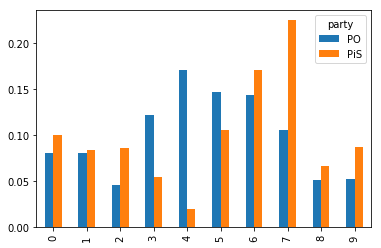

In [30]:
bar_pca = party_lda.\
    groupby('party').mean().transpose().plot.bar()

**Task**

Visualize LDA in 2d space grouped by party. Try PCA or t-SNE (t-SNE may take much time to converge).

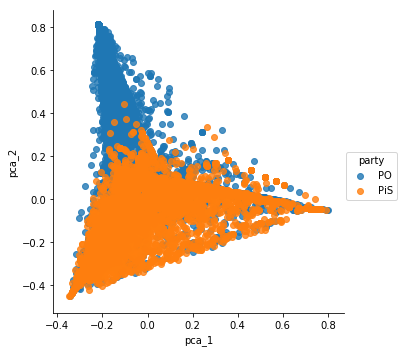

In [32]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)

pca_lda = pca_model.fit_transform(lda_features)




pca_lda = pd.DataFrame(pca_lda)
pca_lda.columns = ['pca_1', 'pca_2']

pca_lda = pd.concat([pca_lda, sejm['party'].reset_index()['party']], axis=1)


import seaborn as sns

pca_scatter = sns.lmplot(data=pca_lda, 
                   x='pca_1', y='pca_2', hue='party', 
                   fit_reg=False, legend=True, legend_out=True)

**Task**

Pick one topic and visualize its share changes in time.

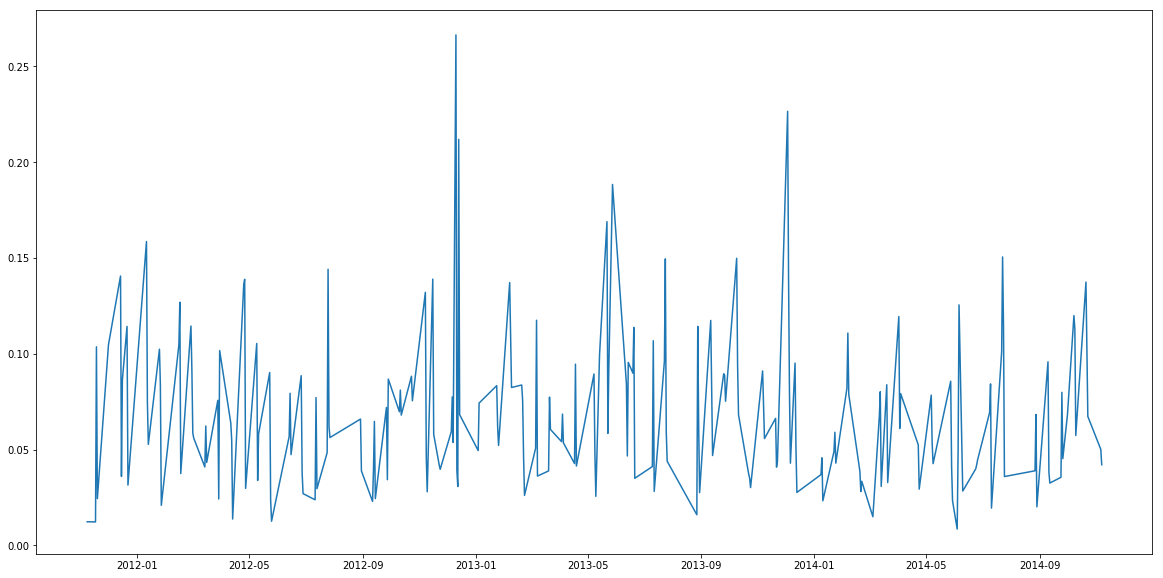

In [40]:
budget_lda = pd.DataFrame({'budget': party_lda.iloc[:, 9].values,
             'date': sejm['date']})

from datetime import datetime
budget_lda['date'] = budget_lda['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

budget_lda = budget_lda.groupby('date').mean().reset_index()
budget_lda['subject'] = 0

from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 10
budget_plot = plt.plot(budget_lda['date'], budget_lda['budget'])

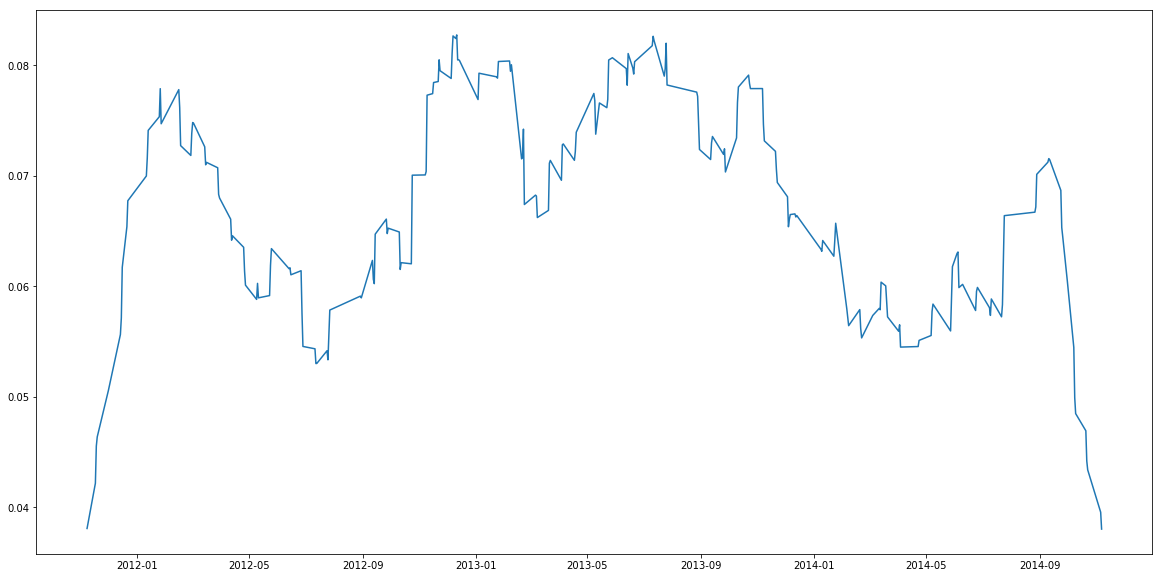

In [41]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')

smooth_budget_plot = plt.plot(budget_lda['date'], moving_average(budget_lda['budget'], 25))

**Task** (Exhaustive)

Play with different numbers of topics in LDA. Try grid searching over number of topics maximizing log-likelihood. Which number is the best for the party classification problem?

**Task**

Compare different parties subsets using LDA.